In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

In [2]:
np.random.seed(0) # singleton RandomState

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
# custom color map
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["red", "yellow", "green"]
)

### Data (blob)

In [5]:
from sklearn.datasets import make_blobs

# generate blob data
data, labels = make_blobs(n_samples=1000, # number of datapoints
                          centers=4, # number of blobs - one blob has one label -> number of classes.
                          n_features=2, # number of inputs
                          random_state=0 # same random_state -> generate same data - for repeatability
                         )


# get 2 classes out of these 4 classes(combining 2 each)
labels_orig = labels
# new label:
labels = np.mod(labels_orig, 2)  # remainder dividing by 2
# 0,2 -> 0
# 1,3 -> 1


from sklearn.model_selection import train_test_split

XX_train, XX_val, Y_train, Y_val = train_test_split(
    data, labels, stratify=labels, random_state=0
)

## Generic FF net

- given : number of inputs, number of layers, number of neurons in each layer.
- one output

<img src="model_pictures/generic_ff_net.png" width="40%" height="40%" />

implementation:  
parameters, etc - as DICTIONARIES, where each item is the matrix/vector of i-th layer stuff.  

LOOP THROUGH LAYERS and do stuff.
vector operations, .  

(back propagation - also.. we can do layer wise.. )  
(that layer wise implementaion is what makes it efficient - computing all derivatives in one layer in one go.. thereby avoiding redundant calculations.)

same as before.. but do for all in all layers => looping through the layers.
 


In [6]:
# generic FF network class
from generic_ff_net import GenericFFNet

In [7]:
gfn = GenericFFNet(2, [2, 3])

  0%|          | 0/1000 [00:00<?, ?epoch/s]

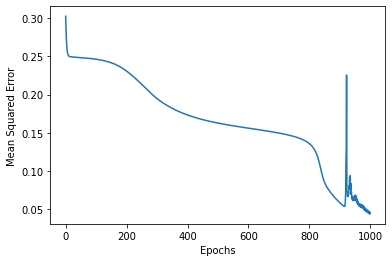

In [14]:
gfn.fit(XX_train, Y_train, epochs=1000, learning_rate=.001, display_loss=True)

loss falls slower - because its a deeper network. - more parameters.. -> learning over large dimensional parameter basis takes time. take bit longer to propagate the gradients through the n/w and dec the error.

In [15]:
# evaluation

Y_pred_train = gfn.predict(XX_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()

Y_pred_val = gfn.predict(XX_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.94


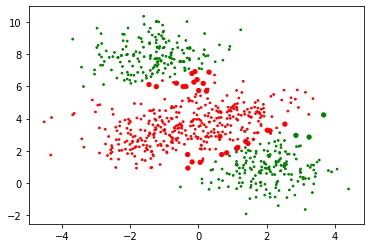

In [16]:
plt.scatter(XX_train[:,0], XX_train[:,1], 
            c=Y_pred_binarised_train, cmap=my_cmap, 
            s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

accuracy is not particularly improving. we don't need more neurons/layers for this data/task.  

number of layers, number of neurons in them - hyperparameters